In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("./data.csv")
data

,Part,Reticle,Tool,Tx,Ty,Rot,Nor,InterTx,InterTy,InterRot,InterNor
0,PA,RA,A,1.5,1.9,0.0025,0.0016,0.09,0.07,0.42,0.49
1,PA,RA,B,2.5,2.7,0.0016,0.0009,0.16,0.17,0.35,0.39
2,PB,RB,C,1.9,0.5,0.0090,0.0081,0.25,0.26,0.07,0.08
3,PB,RB,D,3.4,1.6,0.0085,0.0064,0.04,0.05,0.05,0.09


In [3]:
width, height = 4, 3
monitor_cols = ["Tx", "Ty", "Rot", "Nor", "InterTx", "InterTy", "InterRot", "InterNor"]
scale_list = [
    10.0000, 10.0000, 0.0100, 0.0100,
    1.0000, 1.0000, 1.0000, 1.0000
    ]

ucl_list = [
    5.0000, 5.0000, 0.0050, 0.0050,
    0.5000, 0.5000, 0.5000, 0.5000
    ]
lcl_list = [
    -5.0000, -5.0000, -0.0050, -0.0050,
    -0.5000, -0.5000, -0.5000, -0.5000
    ]

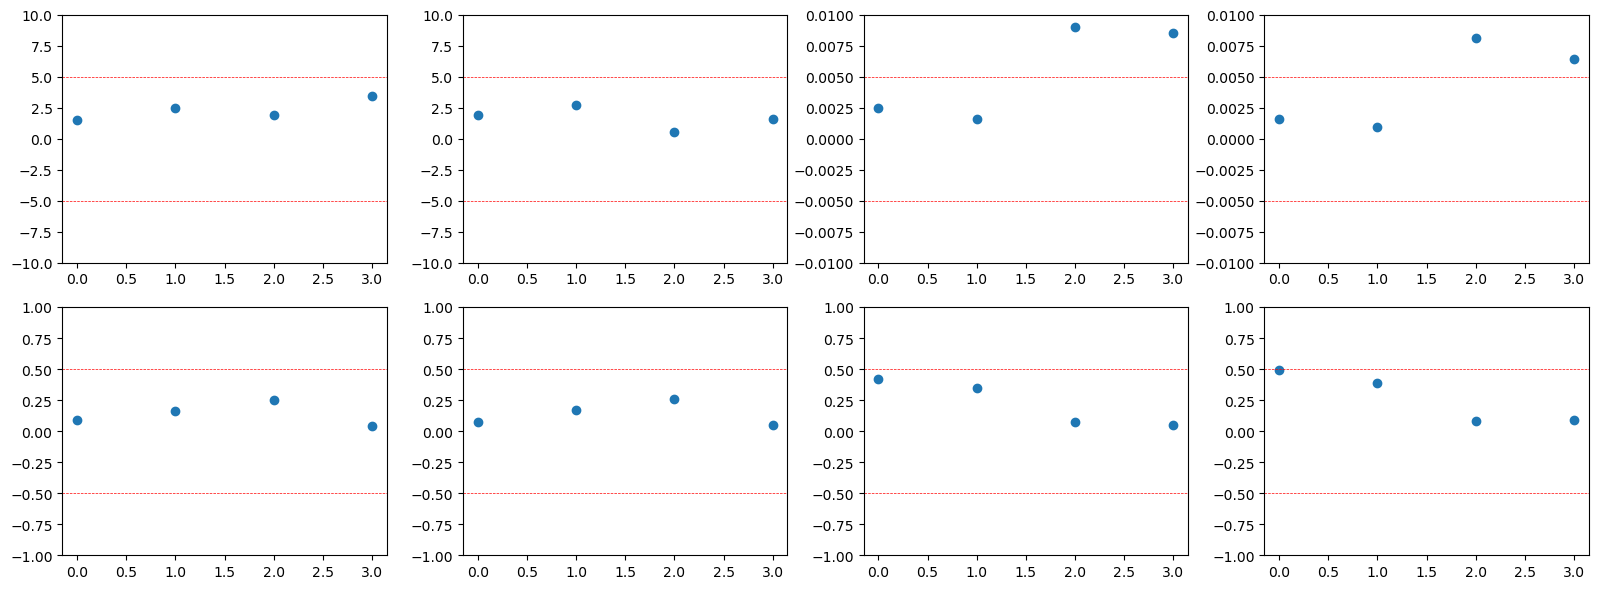

In [20]:
fig, ax = plt.subplots(2,4, figsize=(width*4, height*2))
fax = ax.flatten()
for idx,col in enumerate(data[monitor_cols].columns):
    _ax = fax[idx]
    ax_data = data[col]
    ax_scale = scale_list[idx]
    ax_ucl = ucl_list[idx]
    ax_lcl = lcl_list[idx]
    if max(ax_data)<ax_scale and min(ax_data)>-ax_scale:
        _ax.set_ylim(-scale_list[idx], scale_list[idx])
    else:
        _ax.set_ylim(min(ax_data)-0.05*abs(min(ax_data)), max(ax_data)+0.05*abs(max(ax_data)))
        
    _ax.axhline(y=ax_ucl, color="r", ls="--", lw=0.5)
    _ax.axhline(y=ax_lcl, color="r", ls="--", lw=0.5)
    _ax.scatter(list(range(len(ax_data))), ax_data)
fig.tight_layout()
plt.show()